# Bound State using Conventional Method

Parameters (A, mu, sigma): (3.0, 0.0, 1.0)
Eigenvalues: [-0.24735436]


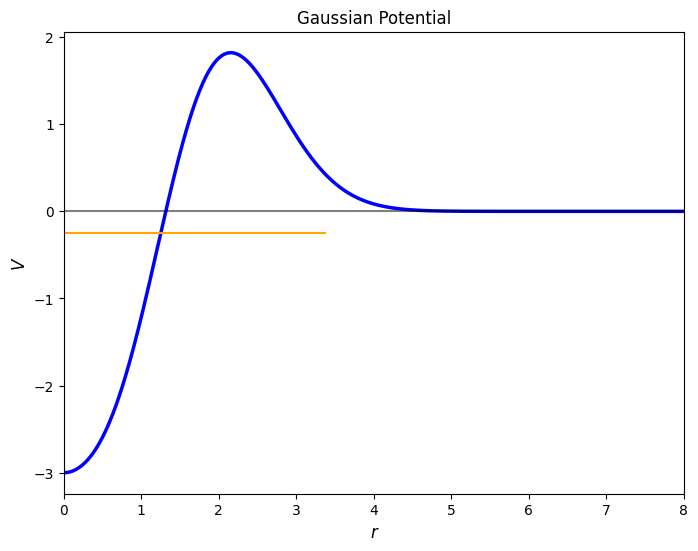

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Function to create inverted Gaussian potential
def inverted_gaussian(r, A, mu, sigma):
    return (r**4 -A) * np.exp(-(r - mu)**2 / ( 2*sigma**2))

# Function to diagonalize Hamiltonian
def diagonalize_hamiltonian(H):
    return eigh_tridiagonal(H.diagonal(0), H.diagonal(-1))

# Function to plot the inverted Gaussian potential and bound states
def inverted_gaussian_plot(energies, wavefunctions, r, steps, n, A, mu, sigma):
    plt.figure(figsize=(8, 6))
    plt.plot(r, inverted_gaussian(r, A, mu, sigma),lw=2.5, color="blue", label="Potential")
    for i in range(n):
        plt.hlines(energies[i], 0., A/1.4*np.sqrt(np.log(-A/energies[i])), color = "orange" )
        #plt.plot(r, energies[i] + np.abs(wavefunctions[:, i])**2, label=f"Bound State {i+1}")
    plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    plt.xlabel("r", family='sans-serif', fontsize=12, fontstyle='italic')
    plt.ylabel("V", family='sans-serif', fontsize=12, fontstyle='italic')
    plt.xlim(0,8)
    #plt.ylim(-5.,0.1)
    plt.title("Gaussian Potential")
    #plt.legend()
    plt.savefig("GC"+".png")
    #plt.grid(True)
    plt.show()

# INPUT
########
# Set parameters for the inverted Gaussian potential
A = 3. # Amplitude
mu = 0.0  # Mean
sigma = 1.0  # Standard deviation
steps = 1000  # Number of steps
hbar = 1.0  # Planck's constant
m = 1. # Particle mass

########
# CODE
########
# Create r-vector
rvec = np.linspace(0.01, 10*sigma, steps, dtype=np.float_)
# Get step size
h = rvec[1] - rvec[0]
# Create the potential from inverted Gaussian function
U = inverted_gaussian(rvec, A, mu, sigma)
# Create Laplacian via 3-point finite-difference method
Laplacian = (-2.0 * np.diag(np.ones(steps)) + np.diag(np.ones(steps - 1), 1)
             + np.diag(np.ones(steps - 1), -1)) / (float)(h ** 2)
# Create the Hamiltonian
Hamiltonian = np.zeros((steps, steps))
[i, j] = np.indices(Hamiltonian.shape)
Hamiltonian[i == j] = U
Hamiltonian += (-0.5) * ((hbar ** 2) / m) * Laplacian
# Diagonalize the Hamiltonian yielding the wavefunctions and energies
E, V = diagonalize_hamiltonian(Hamiltonian)
# Determine number of energy levels to plot (n)
n = 0
while E[n] < 0:
    n += 1
# Print output
print("Parameters (A, mu, sigma):", (A, mu, sigma))
print("Eigenvalues:", E[:n])
# Create plot
inverted_gaussian_plot(E, V, rvec, steps, n, A, mu, sigma)

# Bound State using Scattering Theory

In [1]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

In [2]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2)

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

In [19]:

Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
rlen = len(r)
Mr=1.
l=0
V0=np.pi**2/8
r_span = (0.001,12.)

In [20]:
V0 = 3.#Varray[140]

In [21]:
ktilde = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-300.,0.,num=20000):
    El=iEdel/800+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
    
Eplvls = np.linspace(0.,100.,num=200)/800.+0.000001

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1067701452.py:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1067701452.py:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)


In [33]:
rpsin = CS(Elvls, np.array(ktilde)-rbsc)
vpsin = CS(Elvls, np.array(ktilde)-vbsc)
polE = -10. 
polp = -10.
uwfn = solve_ivp(odeeqns, r_span, y0, t_eval= r, args=(Mr, l, polE, V0),)
penh = 1000.*np.ones((len(Eplvls)))
for sols in rpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
            uwfn = solve_ivp(odeeqns, r_span, y0, t_eval= r, args=(Mr, l, polE, V0),)
            penh = np.sqrt(np.power(2*Mr*Eplvls,6))/np.power(rpsin(Eplvls),2)
for sols in vpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))
            uwfn = solve_ivp(odeeqns, r_span,  y0,t_eval= r, args=(Mr, l, polE, V0),)
            penh = np.sqrt(np.power(2*Mr*Eplvls,6))/np.power(vpsin(Eplvls),2)

V0 =  3.0 , PolE =  -0.24492217620836368


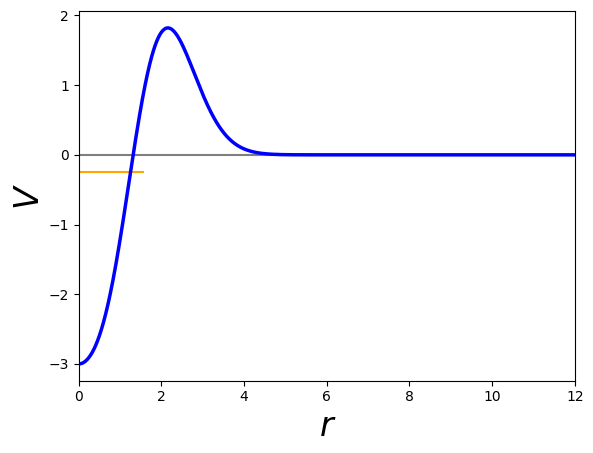

In [34]:
#plt.ylim(-2.0,0.3)
plt.xlim(0, 12.)
plt.xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
if polp<-0.001:
    plt.hlines(polE, 0.,  rpos(polE,V0), colors="orange", linestyle="-",)  # rpos(polp,V0),'''
elif polp>0.001:
    plt.hlines(-polE, 0., rpos(-polE,V0), colors="magenta", linestyle="-",)  #''' rpos(-polp,V0),'''
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(r, Vpot(r,V0), lw=2.5, color="blue")
print("V0 = " ,V0 , ", PolE = ", polE)

-0.24492217620836368 -0.6998888143246236


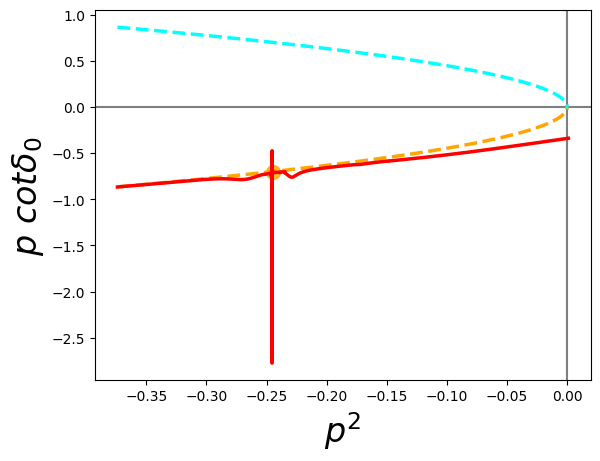

In [35]:
#plt.ylim([-1.50,1.50])
#plt.xlim([-0.38,0.001])
plt.xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(Elvls, rbsc, color="orange", linestyle="dashed", lw=2.5)
plt.plot(Elvls, vbsc, color="cyan", linestyle="dashed", lw=2.5)
plt.plot(Elvls, ktilde, lw=2.5, color="red")
if polp<-0.01:
    plt.scatter(np.array([polE]), np.array([polp]), c="orange", s=100, alpha=0.8) 
elif polp>0.01:
    plt.scatter(np.array([polE]), np.array([polp]), c="magenta", s=100, alpha=0.8) 
print(polE,polp)

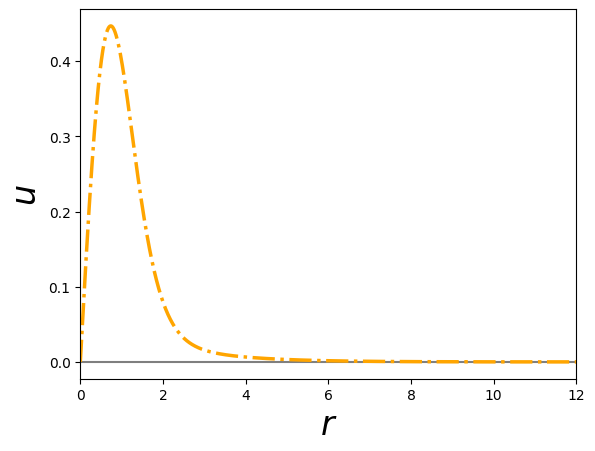

In [36]:
#plt.ylim(-0.1,2.)
plt.xlim(0, 12.)
plt.xlabel("$r$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel("$u$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
#plt.axhline(y=0.74, color='0.0', linestyle='-',alpha=0.5)
if polp<-0.001:
    plt.plot(uwfn.t, uwfn.y[0], lw=2.5, color="orange", linestyle="dashdot")
elif polp>0.001:
    plt.plot(uwfn.t, uwfn.y[0], lw=2.5, color="magenta", linestyle="dashdot")

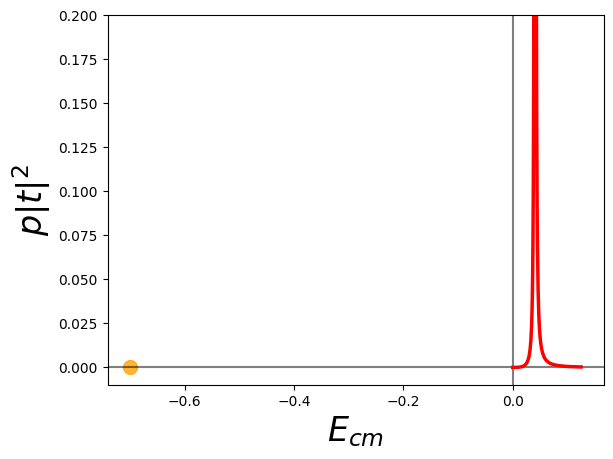

In [37]:
plt.ylim(-0.01,0.2)
#plt.xlim(-0.12, 0.05)
plt.xlabel(r"$E_{cm}$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p|t|^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
if polp<-0.001:
    plt.scatter(np.array([polp]), np.array([0.0]), c="orange", s=100, alpha=0.8) 
    plt.plot(Eplvls, penh, lw=2.5, color="red")
elif polp>0.001:
    plt.plot(Eplvls, penh, lw=2.5, color="red")
    plt.scatter(np.array([-polp]), np.array([0.0]), c="magenta", s=100, alpha=0.8)

# Resonances

In [111]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy

In [40]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)   #-V0*np.exp(-(r)**2) + 2*np.exp(-(r))   -V0*np.exp(-r*r/2) + np.exp(r)                                               

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]

In [41]:
Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
rlen = len(r)
Mr=1.
l=0
V0=np.pi**2/8
r_span = (0.001,12.)

In [42]:
V0 = 3.#Varray[140]

In [144]:
ktilde = []
rbsc = []
vbsc = []
Elvls = []
delta = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    #ktilde.append(np.real(np.power(pmom,2*l+1)))
    x = sy.arctan(np.real(den/num))
    delta.append(x)#np.where(x < 0, np.pi + x, x)) 


Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\4125985131.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\4125985131.py:24: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\4125985131.py:26: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  x = sy.arctan(np.real(den/num))


In [141]:
d = CS(Elvls, np.array(delta))


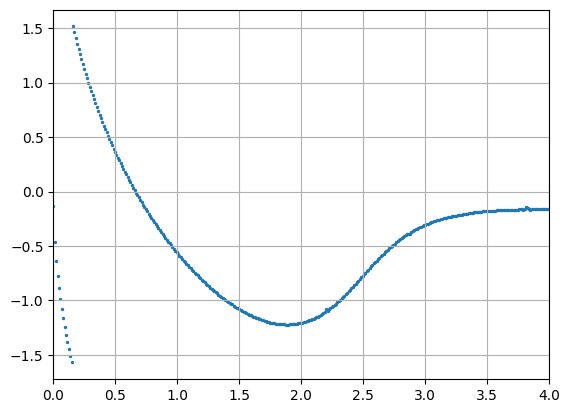

In [143]:
#plt.ylim(0,3.2)
plt.xlim(0.,4)
plt.scatter(Elvls, delta, s = 2)
plt.grid()

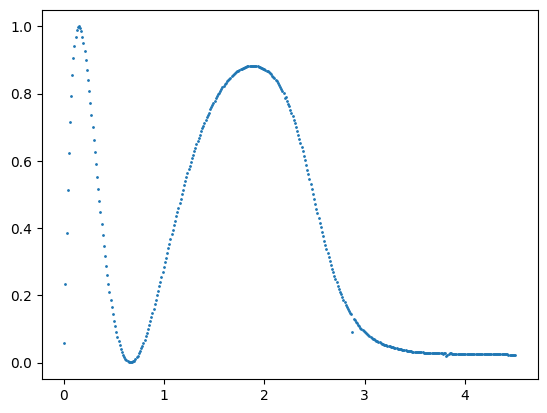

In [75]:
p = np.sin(delta)
p = p*p
plt.scatter(Elvls, np.array(p), s = 1)

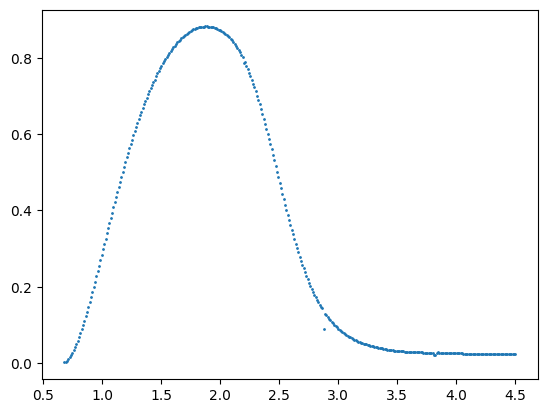

In [74]:
p = np.sin(delta)
p = p*p
plt.scatter(Elvls[60:], np.array(p)[60:], s = 1)

In [72]:
from scipy.optimize import curve_fit

def breit_wigner(E, E0, gamma):
    return (1/4.) * (gamma/2) / ((E - E0)**2 + (gamma/2)**2)

initial_guess = [1., 0.1]

params, covariance = curve_fit(breit_wigner, Elvls[60:], np.array(p)[60:] , p0=initial_guess)

E0_fit, gamma_fit = params

print("E0:", E0_fit)
print("gamma:", gamma_fit)

E0: 1.8554004504319603
gamma: 0.6137285332518376


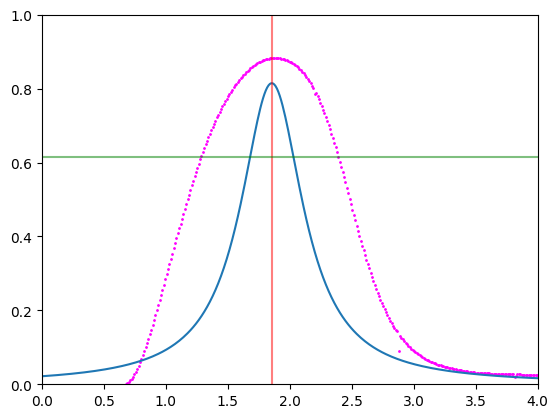

In [73]:
plt.xlim(0,4)
plt.ylim(0,1)
plt.plot(Elvls, breit_wigner(Elvls, params[0], params[1]))
plt.axvline(x=E0_fit, c = "red", alpha=0.5)
plt.axhline(y=gamma_fit, c = "green", alpha=0.5)
plt.scatter(Elvls[60:], np.array(p)[60:], s = 1, c="magenta")

In [416]:
def Vpot(r,V0):
    return -V0*np.exp(-(r)**2) + 2*np.exp(-(r))           #(r**4 -V0)*np.exp(-r*r/1.1)
r=np.linspace(0.001,12.,1500)

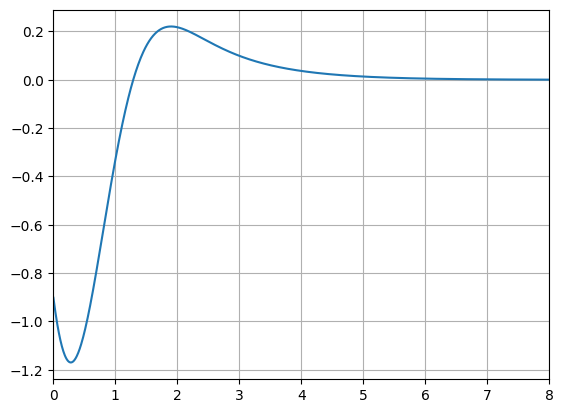

In [417]:
plt.xlim(0,8)
plt.plot(r, Vpot(r,2.9))
plt.grid()

In [118]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
#from scipy.special import lambertw as lamb
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import scipy as sy

In [119]:
def Vpot(r,V0):
    return (r**4 -V0)*np.exp(-r*r/2.)   #-V0*np.exp(-(r)**2) + 2*np.exp(-(r))   -V0*np.exp(-r*r/2) + np.exp(r)                                               

def rpos(Eval, V0):
    return   np.sqrt(np.log(-V0/Eval))

def odeeqns(r, y, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-(Vpot(r,V0) + l*(l+1)/r/r/(2*Mr)))*theta]

In [120]:
Varray = np.loadtxt("F:/Spyder/potential_depths.dat")
y0=[0.,1.]
r=np.linspace(0.001,12.,1500)
rlen = len(r)
Mr=1.
l=0
V0=np.pi**2/8
r_span = (0.001,12.)

In [121]:
V0 = 3.#Varray[140]

In [179]:
k = []
Elvls = []
delta1 = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    k.append(pmom)
    x = sy.arctan(den/num)
    delta1.append(x)#np.where(x < 0, np.pi + x, x)) 


Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:21: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\1570072457.py:24: DeprecationWarning: scipy.arctan is deprecated and will be removed in SciPy 2.0.0, use numpy.arctan instead
  x = sy.arctan(den/num)


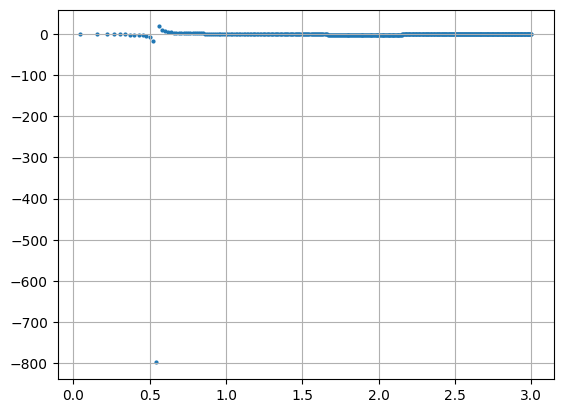

In [180]:

plt.scatter(k, np.tan(delta1), s=4)
plt.grid()

In [159]:
ktilde = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(0,3600.,num=400):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(1j*np.power(pmom,2*l+1))
    vbsc.append(1j*np.power(-pmom,2*l+1))

    usol = solve_ivp(odeeqns, r_span,  y0, t_eval= r, args=(Mr, l, El, V0),)

    #ufunc=CS(usol.t, -usol.y[0])
    Rfunc=CS(usol.t[1:], np.lib.scimath.log(usol.y[0][1:]/usol.t[1:])).derivative()

    #Rvals = Rfunc(usol.t)
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    ktilde.append(np.power(pmom,2*l+1)*num/den)
    
Eplvls = np.linspace(0.,100.,num=200)/800.+0.000001

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

C:\Users\dell\AppData\Local\Temp\ipykernel_10388\3209792550.py:25: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
C:\Users\dell\AppData\Local\Temp\ipykernel_10388\3209792550.py:26: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)


In [160]:
rpsin = CS(Elvls, np.array(ktilde)-rbsc)
vpsin = CS(Elvls, np.array(ktilde)-vbsc)

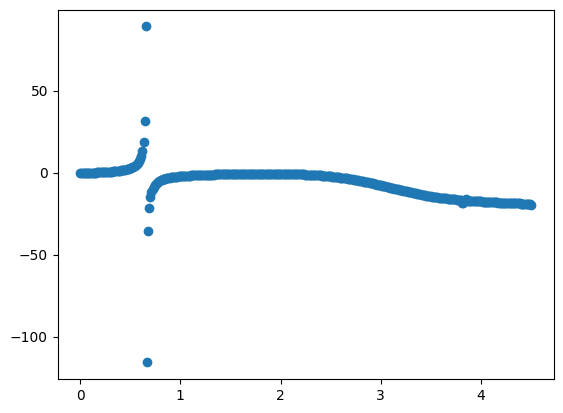

In [183]:
plt.scatter(Elvls, vpsin(Elvls))

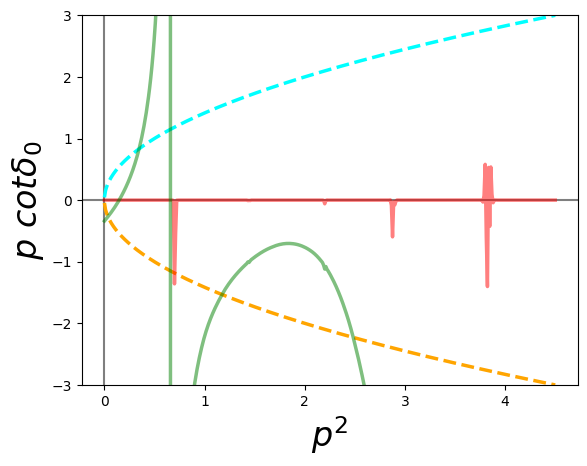

In [184]:
plt.ylim([-3,3])
#plt.xlim([-0.05,0.001])
plt.xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
plt.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
plt.plot(Elvls, 1j*rbsc, color="orange", linestyle="dashed", lw=2.5)
plt.plot(Elvls, 1j*vbsc, color="cyan", linestyle="dashed", lw=2.5)
plt.plot(Elvls, np.imag(ktilde), lw=2.5, color="red", alpha = 0.5)
plt.plot(Elvls, np.real(ktilde), lw=2.5, color="green", alpha = 0.5)